# Exploratory Data Analysis in Action - Data preparation

In this notebook we apply some usefull techniques for cleaning and organizing our data set.


**Import statements**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Global settings**

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
#pd.set_option('display.max_colwidth', -1)
plt.rcParams["figure.figsize"] = [15,6]

## Cleaning and organizing data

![](./_img/Time_data_science.png)

Source: [Gil Press (2016)](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#55852a146f63)

**Load data set**

In [3]:
PATH = "../datasets/"
df_raw = pd.read_csv(PATH + "operations.csv", low_memory=False)

## Data cleaning

[Data cleansing or data cleaning](https://en.wikipedia.org/wiki/Data_cleansing) is the process of **detecting and correcting (or removing) corrupt or inaccurate records** from a record set, table, or database and refers to **identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data**.

In [4]:
df_clean = df_raw.copy()

In [5]:
df_clean.sample(10)

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Pounds),High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Type,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
73857,74050,4/10/1945,ETO,USA,8 AF,NaN,A26,NaN,NaN,NaN,NaN,NaN,NaN,12094,CZECHOSLOVAKIA,EGER,MARSHALLING YARDS,"""RR INSTALLATIONS, TRACKS, MARSHALLING YARDS...",NaN,50.08,12.370000,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,221640.0
100845,101271,8/28/1941,ETO,GREAT BRITAIN,RAF,NaN,HALI,NaN,NaN,NaN,NaN,NaN,NaN,11602,GERMANY,DUISBURG,NaN,"""RR INSTALLATIONS, TRACKS, MARSHALLING YARDS...",NaN,51.43,6.750000,130.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,284790.0
146976,147437,7/29/1945,PTO,USA,20 AF,888,B29,NaN,99,NaN,NaN,NaN,NaN,NaN,JAPAN,UBE,NIPPON MOTOR OIL COO,NaN,1,33.95,131.233333,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,10000 LB PUMPKIN BOMB (ATOMIC BOMB TRAINING),NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,56193.0
76462,76722,4/16/1944,PTO,USA,5 AF,65 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,NEW GUINEA,HOLLANDIA,STORES AREA,NaN,1,-2.50,140.750000,120.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,48.0,1000 LB GP (GP-M44/M65),NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,8671.0
9202,9203,8/6/1944,ETO,NaN,NaN,NaN,B26,NaN,NaN,NaN,NaN,NaN,NaN,9749,FRANCE,COURTALAIN,NaN,BRIDGES,NaN,48.10,1.130000,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,210059.0
125592,126053,6/6/1944,ETO,USA,8 AF,NaN,GB24,NaN,NaN,NaN,NaN,NaN,NaN,6882,FRANCE,CAEN,TACTICAL TARGETS,TACTICAL TARGETS: (UNIDENTIFIED OR NOT LISTED ...,1,49.18,-0.370000,207.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,205669.0
38431,38432,3/21/1945,ETO,NaN,NaN,NaN,B17,NaN,NaN,NaN,NaN,NaN,NaN,32066,GERMANY,OLDENBURG,AIRDROME,AIR FIELDS AND AIRDROMES,1,53.95,13.560000,242.0,37.0,37.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,NaN,NaN,218712.0
46454,46512,2/21/1944,ETO,USA,9 AF,NaN,GB17,NaN,NaN,NaN,NaN,NaN,NaN,99997,GERMANY,CITY TOT UNDER 6 TON,UNIDENTIFIED TARGETS,UNIDENTIFIED TARGETS,1,NaN,NaN,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,162554.0
84815,85188,4/14/1945,MTO,USA,12 AF,NaN,A20,NaN,NaN,NaN,NaN,NaN,NaN,90599,ITALY,44 40 N 009 40 E,ROAD BLOCK,TACTICAL TARGETS: (UNIDENTIFIED OR NOT LISTED ...,1,44.67,9.670000,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222550.0
68862,69029,4/8/1945,ETO,NaN,NaN,NaN,GB24,NaN,NaN,NaN,NaN,NaN,NaN,15192,GERMANY,FURTH,A C COMPONENTS,A/C COMPONENT PLANTS,1,48.92,12.670000,212.0,31.0,31.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,191000.0


## Open issues

-  Identify incomplete, incorrect, inaccurate or irrelevant parts of the data   
-  Correct or remove incorrect, inaccurate or irrelevant parts of the data
-  Subsetting the data set

### Dealing with incomplete data (`NaN`)

Missing values in data sets are a well-known problem as nearly everywhere, where data is measured and recorded, issues with missing values occur. Various reasons lead to missing values: values may not be measured, values may be measured but get lost or values may be measured but are considered unusable. Missing values can lead to problems, because often further data processing and analysis steps rely on complete data sets. Therefore missing values need to be replaced with reasonable values. In statistics this process is called **imputation**.

When faced with the problem of missing values it is important to understand the mechanism that causes missing data. Such an understanding is useful, as it may be employed as background knowledge for selecting an appropriate imputation strategy. 

**Check for `NaN` **

Note that in many cases missing values are assigned special characters, such as `-999`, `NA`, `k.A.` etc.; hence, you as a data analyst are responsible for taking appropriate action.    

In [6]:
df_clean.shape[0]

178281

In [7]:
df_clean.isnull().sum()

Mission ID                                    0
Mission Date                                  0
Theater of Operations                      3158
Country                                   51787
Air Force                                 51837
Unit ID                                  127368
Aircraft Series                             116
Callsign                                 178260
Mission Type                             131095
Takeoff Base                             174898
Takeoff Location                         174943
Takeoff Latitude                         175300
Takeoff Longitude                        175301
Target ID                                 50875
Target Country                              599
Target City                                2263
Target Type                               31911
Target Industry                           51802
Target Priority                           43561
Target Latitude                            8716
Target Longitude                        

In [8]:
df_clean.notnull().sum()

Mission ID                               178281
Mission Date                             178281
Theater of Operations                    175123
Country                                  126494
Air Force                                126444
Unit ID                                   50913
Aircraft Series                          178165
Callsign                                     21
Mission Type                              47186
Takeoff Base                               3383
Takeoff Location                           3338
Takeoff Latitude                           2981
Takeoff Longitude                          2980
Target ID                                127406
Target Country                           177682
Target City                              176018
Target Type                              146370
Target Industry                          126479
Target Priority                          134720
Target Latitude                          169565
Target Longitude                        

**Strategies to deal with missing data in Python**

In general there are many options to consider when imputing missing values, for example:
* A constant value that has meaning within the domain, such as 0, distinct from all other values.
* A value from another randomly selected record.
* A mean, median or mode value for the column.
* A value estimated by another predictive model.

There are some libraries implementing more or less advanced missing value imputation strategies such as 

* [`statsmodels`](http://www.statsmodels.org/dev/imputation.html) (Multiple Imputation with Chained Equations (MICE))
* [`fancyimpute`](https://github.com/iskandr/fancyimpute) (matrix completion and imputation algorithms)
* [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) (mean, median, most frequent)
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) (`fillna`, `interpolate` methods)


**Our working strategy to deal with missing data**

_Owing to the fact that the amount of missing values in our data set is considerble high and thet probably our domain knowledge with respect to World War II histroy is limited simply remove all features of the data set where more the 50% of the data is missing._  
> **Challenge**: Write a function (or a script) which takes in our data set and a threshold value of 0.5 and which returns the column names of features that include more data than the given threshold. We then use the returned column names for subsetting our data set. 

In [9]:
def features_above_threshold(df, threshold=0.5):
    ## your code here ...
    pass

In [10]:
def features_above_threshold(df, threshold=0.5):    
    cols2keep = df.notnull().sum()/df.shape[0] > threshold 
    rv = df.columns[cols2keep.values]
    return rv

**Apply `features_above_threshold` on our data set**

In [11]:
cols2keep = features_above_threshold(df_clean, threshold=0.5)
cols2keep

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Aircraft Series', 'Target ID', 'Target Country',
       'Target City', 'Target Type', 'Target Industry', 'Target Priority',
       'Target Latitude', 'Target Longitude', 'Altitude (Hundreds of Feet)',
       'Attacking Aircraft', 'High Explosives Weight (Tons)',
       'Total Weight (Tons)', 'Source ID'],
      dtype='object')

**Reassign subsetted data set to the variable `df_clean`**

In [12]:
df_clean = df_clean[cols2keep]
df_clean.shape

(178281, 19)

In [13]:
df_clean.sample(3)

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,High Explosives Weight (Tons),Total Weight (Tons),Source ID
112489,112950,5/27/1944,ETO,NaN,NaN,B26,26192,FRANCE,MAISONS LAFFITTE,NaN,BRIDGES,NaN,48.95,2.13,115.0,NaN,56.0,56.0,204581.0
67855,68020,3/30/1944,ETO,GREAT BRITAIN,RAF,HVY,39406,GERMANY,SCHWEINFURT,CITY AREA,CITIES TOWNS AND URBAN AREAS,NaN,50.05,10.25,NaN,NaN,1.0,3.0,294395.0
106933,107365,11/25/1944,ETO,NaN,NaN,B17,27630,GERMANY,MERSEBURG,LEUNA SYN OIL PLANT,SYNTHETIC OIL REFINERIES,2,51.35,12.00,266.0,12.0,30.0,30.0,178403.0


In [14]:
df_clean.isnull().sum()

Mission ID                           0
Mission Date                         0
Theater of Operations             3158
Country                          51787
Air Force                        51837
Aircraft Series                    116
Target ID                        50875
Target Country                     599
Target City                       2263
Target Type                      31911
Target Industry                  51802
Target Priority                  43561
Target Latitude                   8716
Target Longitude                  8738
Altitude (Hundreds of Feet)      57455
Attacking Aircraft               53173
High Explosives Weight (Tons)    32080
Total Weight (Tons)              11773
Source ID                         4045
dtype: int64

### Dealing with incorrect data (looking for outliers)

* **Check that mission dates are bewteen 1939 and 1945**

In [15]:
df_clean["Mission Date"].dtype

dtype('O')

In [16]:
df_clean.loc[0:15, "Mission Date"]

0     8/15/1943
1     8/15/1943
2     8/15/1943
3     8/15/1943
4     8/15/1943
5     8/15/1943
6     8/15/1943
7     8/15/1943
8     8/15/1943
9     8/15/1943
10    8/15/1943
11    8/15/1943
12    8/15/1943
13    8/15/1943
14    8/15/1943
15    8/15/1943
Name: Mission Date, dtype: object

> **Challenge**: Reassign the `Mission Date` variable, a `string` object with o a time-aware `datetime` object.    
_Hint: pandas comes with a_ `.to_datetime` _method_


In [17]:
## your code here ...

In [18]:
df_clean["Mission Date"] = pd.to_datetime(df_clean["Mission Date"], infer_datetime_format=True)

In [19]:
df_clean["Mission Date"].head()

0   1943-08-15
1   1943-08-15
2   1943-08-15
3   1943-08-15
4   1943-08-15
Name: Mission Date, dtype: datetime64[ns]

Once we have a `datetime` object we can use it to extract the year, month and day assign those to a unique columns in out data set (`year`, `month` and `day`)

In [20]:
df_clean["year"] = df_clean["Mission Date"].dt.year
df_clean["month"] = df_clean["Mission Date"].dt.month
df_clean["day"] = df_clean["Mission Date"].dt.day

In [21]:
df_clean[["Mission Date", "year", "month", "day"]].sample(10)

,Mission Date,year,month,day
66398,1945-04-06,1945,4,6
46346,1940-07-19,1940,7,19
109385,1944-11-27,1944,11,27
148945,1943-03-29,1943,3,29
173073,1943-07-25,1943,7,25
18174,1944-08-15,1944,8,15
164205,1943-06-16,1943,6,16
23850,1943-12-03,1943,12,3
160801,1944-07-07,1944,7,7
171859,1943-07-19,1943,7,19


Finally we ask for the minimum and the maximum value of the `year` column.

In [22]:
print(df_clean["year"].min())
print(df_clean["year"].max())

1939
1945


* __Check if the values in the altitude column (`Altitude (Hundreds of Feet)`) is within reasonable bounds__ 

> __Challenge__: Add a new column to the data set (`Altitude (meters)`) by transforming th values in the `Altitude (Hundreds of Feet)` from feet to meters.   
_Hint: You may use the `apply` method._

$$1\;\text{foot} =  0.3048\; \text{meter}$$

In [23]:
## your code here ...
df_clean["Altitude (meters)"] = None 

In [24]:
df_clean["Altitude (meters)"] = df_clean["Altitude (Hundreds of Feet)"].apply(lambda x: x*100*0.3048)

In [25]:
df_clean["Altitude (meters)"].describe()

count    1.208260e+05
mean     4.237537e+03
std      5.694221e+03
min      0.000000e+00
25%      2.133600e+03
50%      3.718560e+03
75%      6.797040e+03
max      1.219200e+06
Name: Altitude (meters), dtype: float64

In [26]:
df_clean["Altitude (meters)"].max()

1219200.0

Considering the output from above and answers to the question "_At what altitude could WW2 planes fly?_" on [Quora](https://www.quora.com/At-what-altitude-could-WW2-planes-fly-What-was-the-record-altitude-during-the-war-and-what-planes-could-fly-at-a-high-altitude-Could-they-fly-at-the-same-altitude-as-these-days-or-not), indicating that flight heights above 40,000 feet (approx. 12,000 m) occured rarely.

> __Challenge__: Limit the reported altitudes to 15,000 m and replace  outliers with `np.nan`.

In [27]:
## your code here ...

In [28]:
max_height = 15000
print((df_clean["Altitude (meters)"] > max_height).sum())

# replace values with np.nan
df_clean.loc[df_clean["Altitude (meters)"] > max_height, "Altitude (meters)"] = np.nan

# check replacement
print((df_clean["Altitude (meters)"] > max_height).sum())

df_clean["Altitude (meters)"].describe()

26
0


count    120800.000000
mean       4193.066365
std        2685.069721
min           0.000000
25%        2133.600000
50%        3718.560000
75%        6797.040000
max       14173.200000
Name: Altitude (meters), dtype: float64

* __Check if the values in the target location columns (`Target Latitude` and `Target Longitude`) is within reasonable bounds__.

Note that the loaction is given in geographic coordinates, hence, the values should be within -90 to 90 degree latitude and -180 to 180 degree longitude.

In [29]:
df_clean[['Target Latitude', 'Target Longitude']].describe()

,Target Latitude,Target Longitude
count,169565.000000,169543.000000
mean,38.067793,43.340213
std,18.711405,59.681160
min,-37.416667,-179.451285
25%,26.250000,7.620000
50%,47.500000,11.330000
75%,50.930000,97.400000
max,1108.000000,1000.650000


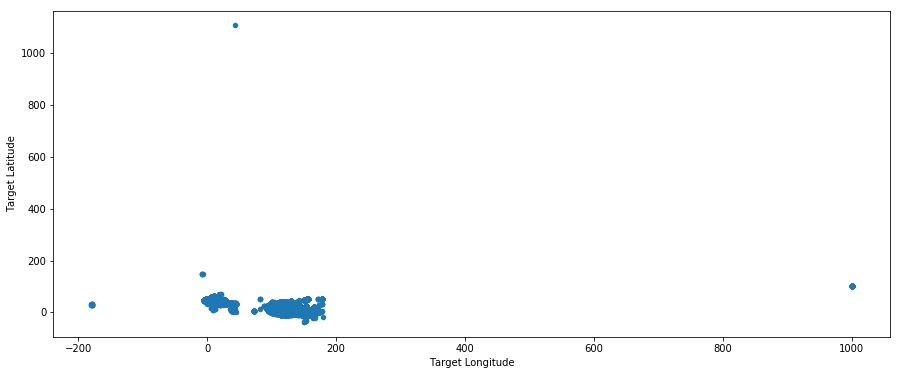

In [30]:
df_clean.plot.scatter( x='Target Longitude', y='Target Latitude');

Considering the table and the plot above there are some deviations from the expected values.

> __Challenge__: Replace geographical coordinates ouside the natural limits [-90, 90] degrees latitude and [-180, 180] degrees longitude with `np.nan`.

In [31]:
## your code here ...

Target Longitude    120
Target Latitude     120
dtype: int64


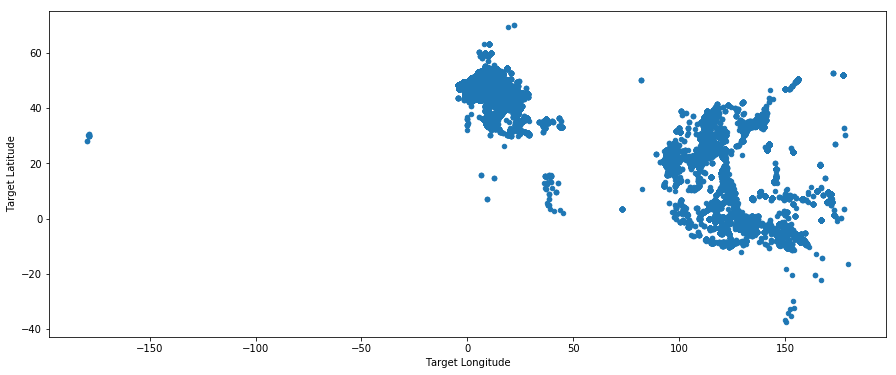

In [32]:
print(df_clean.loc[((df_clean['Target Longitude'] > 180) |
                    (df_clean['Target Longitude'] < -180) | 
                    (df_clean['Target Latitude'] > 90 )| 
                    (df_clean['Target Latitude'] < -90)), 
                   ['Target Longitude', 'Target Latitude']].count())

df_clean.loc[((df_clean['Target Longitude'] > 180) |
                    (df_clean['Target Longitude'] < -180) | 
                    (df_clean['Target Latitude'] > 90 )| 
                    (df_clean['Target Latitude'] < -90)), 
                   ['Target Longitude', 'Target Latitude']] = np.nan

df_clean.plot.scatter( x='Target Longitude', y='Target Latitude');

### Dealing with irrelavant data

Our data set, as well as other data sets we encounter, sometimes come with features which are irrelevant for the purpose our research question. Hence, to reduce the data set size for the purpose of better readability as well as memory issues, amomg other, we may drop data columns. However, once again domain knowledge helps to deceide which columns are of interest or not.   

In [33]:
df_clean.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Aircraft Series', 'Target ID', 'Target Country',
       'Target City', 'Target Type', 'Target Industry', 'Target Priority',
       'Target Latitude', 'Target Longitude', 'Altitude (Hundreds of Feet)',
       'Attacking Aircraft', 'High Explosives Weight (Tons)',
       'Total Weight (Tons)', 'Source ID', 'year', 'month', 'day',
       'Altitude (meters)'],
      dtype='object')

In [34]:
df_clean.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,High Explosives Weight (Tons),Total Weight (Tons),Source ID,year,month,day,Altitude (meters)
0,1,1943-08-15,MTO,USA,12 AF,A36,40675,ITALY,SPADAFORA,NaN,NaN,NaN,38.220000,15.370000,NaN,NaN,10.0,10.0,NaN,1943,8,15,NaN
1,2,1943-08-15,PTO,USA,5 AF,B24,NaN,NEW GUINEA,KOMIATUM,RIDGE,NaN,1,-7.166667,147.000000,44.0,6.0,20.0,20.0,9366.0,1943,8,15,1341.12
2,3,1943-08-15,MTO,USA,12 AF,A36,9630,ITALY,COSENZA,NaN,NaN,NaN,39.270000,16.250000,NaN,NaN,9.0,9.0,NaN,1943,8,15,NaN
3,4,1943-08-15,MTO,USA,12 AF,A36,16140,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.430000,15.900000,NaN,NaN,7.5,7.5,NaN,1943,8,15,NaN
4,5,1943-08-15,PTO,USA,5 AF,B24,NaN,SUMATRA,KILA,VILLAGE,NaN,1,-1.116667,103.883333,60.0,6.0,8.0,8.0,22585.0,1943,8,15,1828.80


Exploring the data set above we deceide to drop the columns `Air Force`, `Target ID`, `Target Priority`, `Altitude (Hundreds of Feet)`, `Source ID`. 

One way to achieve this task with Python is to use the powerful [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).  

In [35]:
cols2exlude = ['Theater of Operations', 'Air Force', 'Target ID', 
               'Target Priority', 'Altitude (Hundreds of Feet)', 'Source ID']

In [36]:
df_clean = df_clean[[c for c in df_clean.columns if c not in cols2exlude]] 
# check operation
df_clean.columns

Index(['Mission ID', 'Mission Date', 'Country', 'Aircraft Series',
       'Target Country', 'Target City', 'Target Type', 'Target Industry',
       'Target Latitude', 'Target Longitude', 'Attacking Aircraft',
       'High Explosives Weight (Tons)', 'Total Weight (Tons)', 'year', 'month',
       'day', 'Altitude (meters)'],
      dtype='object')

### Spatial subsetting the data set

In [37]:
df_subset = df_clean.copy()

***
### Spatial Data

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
df.columns

In [ ]:
df[['Target Latitude', 'Target Longitude']].head()

In [ ]:
geometry = [Point(xy) for xy in zip(df['Target Longitude'], df['Target Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.head()

In [ ]:
gdf.plot()

In [ ]:
_ = gdf.loc[((gdf['Target Longitude'] > 180) | 
             (gdf['Target Longitude'] < -180) | 
             (df['Target Latitude'] > 90 )| 
             (df['Target Latitude'] < -90)), ['Target Longitude', 'Target Latitude']]
print(_.shape)
_.sample(15)

In [ ]:
gdf = gdf.loc[~(
    (gdf['Target Longitude'] > 180) |
    (gdf['Target Longitude'] < -180) |                
    (df['Target Latitude'] > 90)| 
    (df['Target Latitude'] < -90)
               )
             ]
print(gdf.shape)

In [ ]:
gdf[['Target Longitude', 'Target Latitude']].isnull().sum()

In [ ]:
gdf = gdf.loc[gdf[['Target Longitude', 'Target Latitude']].notnull().all(axis = 1)]
print(gdf.shape)

In [ ]:
gdf.plot()

In [ ]:
gdf.crs =  {'init' :'epsg:4326'}

### Load “Natural Earth” countries dataset, bundled with GeoPandas

“[Natural Earth](http://www.naturalearthdata.com/) is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.” A subset comes bundled with GeoPandas and is accessible from the gpd.datasets module. We’ll use it as a helpful global base layer map.



In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

In [ ]:
world.crs

In [ ]:
world.plot(facecolor='lightgray')

In [ ]:
base=world.plot(facecolor='lightgray')
gdf.plot(ax=base, marker='o', color='red', markersize=10, alpha=0.01)

In [ ]:
gdf["Target Country"].isin(["GERMANY", "FRANCE", "ITALY"]).sum()/gdf.shape[0]

Area: 73.5°N 27.0°W 33.0°N 45.0°E

In [ ]:
from shapely.geometry import Polygon
poly_europe = gpd.GeoSeries([Polygon([(-27,33), (45,33), (45,73.5), (-27,73.5)])])
bb_europe = gpd.GeoDataFrame({'geometry': poly_europe})
bb_europe.crs = {'init' :'epsg:4326'}

In [ ]:
base=world.plot(facecolor='lightgray')
bb_europe.plot(ax=base,alpha=0.5)

In [ ]:
gdf_europe = gpd.sjoin(gdf, bb_europe, how="inner", op='intersects')
print(gdf_europe.shape)

In [ ]:
gdf_europe.plot()

In [ ]:
europe = gpd.overlay(world, bb_europe, how='intersection')

In [ ]:
base=europe.plot(facecolor='lightgray')
gdf_europe.plot(ax=base, marker='o', color='red', markersize=5, alpha=0.01)

***
## Exploratory data analysis

In [ ]:
df = df_eng.copy()
df.shape

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.reset_index().groupby("Mission Date").count()["Mission ID"].plot()

In [ ]:
df.Country.unique()

In [ ]:
df.reset_index().groupby("Country").count()["Mission ID"].plot.bar()

In [ ]:
df.reset_index().groupby(["year",  "Country"]).count()["Mission ID"].unstack().plot.bar(rot=0)

In [ ]:
df.reset_index().groupby(["month",  "Country"]).count()["Mission ID"].unstack().plot.bar(rot=0)

In [ ]:
df.groupby(["year",  "Country"]).mean()['Altitude (meters)'].unstack().plot.bar()

In [ ]:
df.groupby(["Country"]).agg(["max", "median"])['Altitude (meters)'].plot.bar()

In [ ]:
df['High Explosives Weight (Tons)'].plot.hist(bins=100)

In [ ]:
df.groupby(["Country"]).agg(["mean", "median"])['High Explosives Weight (Tons)'].plot.bar()

In [ ]:
df.groupby(["year",  "Country"]).median()['High Explosives Weight (Tons)'].unstack().plot.bar()   

In [ ]:
_ = df.groupby("Target Country")["Target Country"].value_counts()
_[_ > 2000].plot.pie()

In [ ]:
df.reset_index().groupby(["year",  "Target Country"])["Mission ID"].count().sort_values(ascending=False)#.unstack().plot.bar()   

In [ ]:
len(df["Target Type"].unique())

In [ ]:
len(df["Target Industry"].unique())

In [ ]:
df.reset_index().groupby("Target Industry").count()["Mission ID"].sort_values(ascending=False).plot.bar(figsize=(16,4))

In [ ]:
df['Target Country'].unique()

In [ ]:
df.reset_index().groupby("Target Country").count()["Mission ID"].sort_values(ascending=False).plot.bar(figsize=(16,4))

In [ ]:
df.groupby("Target Country").sum()["High Explosives Weight (Tons)"].sort_values(ascending=False).plot.bar(figsize=(16,4))

#### Kernel density plot

In [ ]:
import seaborn as sns

In [ ]:
#fig, ax = plt.subplots(224)
fig = plt.figure(figsize=(16,12))
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
bws = [0.2, 0.4, 0.6, 0.8]
for e in range(4):
    ax = plt.subplot(2,2,e+1)
    ax.set_aspect('equal')
    europe.plot(ax=ax, facecolor='lightgray')
    sns.kdeplot(gdf_europe['Target Longitude'], gdf_europe['Target Latitude'],
                cmap="viridis", shade=True, shade_lowest=False, ax=ax, bw=bws[e])
    ax.set_title("Bandwith: " + str(bws[e]), size=16)
plt.tight_layout()
plt.suptitle("KDE for different bandwith parameters", size=22);

In [ ]:
gdf_europe.Country.unique()

In [ ]:
gdf_europe.Country.replace(np.nan, "unknown", inplace=True)

In [ ]:
fig = plt.figure(figsize=(16,12))
years = [1940, 1941 ,1942, 1943, 1944, 1945]
for e in range(len(years)):
    ax = plt.subplot(3,2,e+1)
    ax.set_aspect('equal')
    europe.plot(ax=ax, facecolor='lightgray')
    _ = gdf_europe.loc[gdf_europe.year == years[e]]
    _.plot(ax=ax, marker='o', cmap='Set1',           
           column='Country', legend=True, 
           markersize=5, alpha=1)
    ax.set_title("Year: " + str(years[e]), size=16)    
plt.tight_layout()
plt.suptitle("Attacks for different years", size=22)
plt.subplots_adjust(top=0.92)